In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

In [2]:
img = cv2.imread("guanyin.jpg")
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [3]:
def on_mouse(event, x, y, flags, param):
    global img, point1, point2, box
    img2 = img.copy()
    if event == cv2.EVENT_LBUTTONDOWN:  # 左键点击
        point1 = (x, y)
        cv2.circle(img2, point1, 10, (0, 255, 0), 5)
        cv2.imshow('image', img2)
    # 按住左键拖曳
    elif event == cv2.EVENT_MOUSEMOVE and (flags & cv2.EVENT_FLAG_LBUTTON):
        cv2.rectangle(img2, point1, (x, y), (255, 0, 0), 5)
        cv2.imshow('image', img2)
    elif event == cv2.EVENT_LBUTTONUP:  # 左键释放
        point2 = (x, y)
        cv2.rectangle(img2, point1, point2, (0, 0, 255), 5)
        cv2.imshow('image', img2)
        min_x = min(point1[0], point2[0])
        min_y = min(point1[1], point2[1])
        width = abs(point1[0] - point2[0])
        height = abs(point1[1] - point2[1])
        box = img[min_y:min_y+height, min_x:min_x+width]

In [4]:
cv2.namedWindow('image')
cv2.setMouseCallback('image',on_mouse)
cv2.imshow('image',img)
cv2.waitKey(0)

-1

In [5]:
rect = (min(point1[0],point2[0]),min(point1[1],point2[1]),abs(point1[0]-point2[0]),abs(point1[1]-point2[1]))
mask, bgdModel, fgdModel = cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

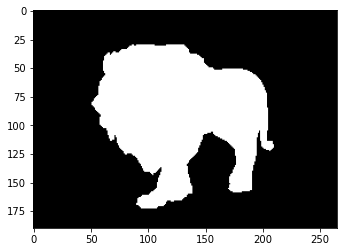

In [6]:
mask2 = np.where((mask == cv2.GC_BGD) | (mask == cv2.GC_PR_BGD), 0, 1).astype(np.uint8)
plt.imshow(mask2, cmap="gray")

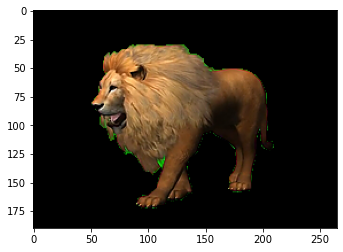

In [7]:
img = img * mask2[:,:,np.newaxis]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)